In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway,kruskal
import warnings
warnings.filterwarnings("ignore")

## Importing files


In [2]:
customer=pd.read_csv("Customers.csv")
dc=pd.read_csv("Discount_Coupon.csv")
ms=pd.read_csv("Marketing_Spend.csv")
os=pd.read_csv("Online_Sales.csv")
ta=pd.read_csv("Tax_amount.csv")

In [3]:
os.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [4]:
customer.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [5]:
dc.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [6]:
ms.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [7]:
ta.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


## Basic operation on data set

In [8]:
os['Transaction_Date'] = pd.to_datetime(os['Transaction_Date'])
os['Month']=os['Transaction_Date'].dt.strftime('%b')
os.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [9]:
new=pd.merge(os,dc,on=['Month','Product_Category'],how='left')
new.head()


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0


In [10]:
merge_df=pd.merge(new,ta, on = 'Product_Category', how = 'left')
merge_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10%
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10%
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10%
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18%
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18%


In [11]:
merge_df['GST'] = merge_df['GST'].str.rstrip('%').astype(float)
merge_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0


In [14]:
final=pd.merge(merge_df,customer,on=['CustomerID'],how='left')
final.head()


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12


In [15]:
final.drop(columns='Product_Description',inplace=True)


In [16]:
final.head()
exp=final.copy() # fro calculation

## Numerical Analysis 

In [17]:
final.shape

(52924, 16)

In [18]:
final.ndim

2

In [19]:
final.size

846784

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        52924 non-null  int64         
 1   Transaction_ID    52924 non-null  int64         
 2   Transaction_Date  52924 non-null  datetime64[ns]
 3   Product_SKU       52924 non-null  object        
 4   Product_Category  52924 non-null  object        
 5   Quantity          52924 non-null  int64         
 6   Avg_Price         52924 non-null  float64       
 7   Delivery_Charges  52924 non-null  float64       
 8   Coupon_Status     52924 non-null  object        
 9   Month             52924 non-null  object        
 10  Coupon_Code       52524 non-null  object        
 11  Discount_pct      52524 non-null  float64       
 12  GST               52924 non-null  float64       
 13  Gender            52924 non-null  object        
 14  Location          5292

### Handling NULL


In [21]:
final.isnull().sum()

CustomerID            0
Transaction_ID        0
Transaction_Date      0
Product_SKU           0
Product_Category      0
Quantity              0
Avg_Price             0
Delivery_Charges      0
Coupon_Status         0
Month                 0
Coupon_Code         400
Discount_pct        400
GST                   0
Gender                0
Location              0
Tenure_Months         0
dtype: int64

In [22]:
final['Coupon_Code'].fillna('NA',inplace=True)
final['Discount_pct'].fillna(0,inplace=True)

In [23]:
final['Invoice Value'] = ((final['Quantity'] * final['Avg_Price']) * (1 - final['Discount_pct']/100) * (1 + final['GST']/100)) + final['Delivery_Charges']
final['Invoice Value']=np.round(final['Invoice Value'],2)
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02


In [24]:
final.isnull().sum()

CustomerID          0
Transaction_ID      0
Transaction_Date    0
Product_SKU         0
Product_Category    0
Quantity            0
Avg_Price           0
Delivery_Charges    0
Coupon_Status       0
Month               0
Coupon_Code         0
Discount_pct        0
GST                 0
Gender              0
Location            0
Tenure_Months       0
Invoice Value       0
dtype: int64

In [25]:
final.duplicated().value_counts()

False    52924
Name: count, dtype: int64

In [26]:
final.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Tenure_Months,Invoice Value
count,52924.00000,52924.000000,52924,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630,19.802358,13.746183,26.127995,89.080716
min,12346.00000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000,0.000000,5.000000,2.000000,4.380000
25%,13869.00000,25384.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000,10.000000,10.000000,15.000000,18.550000
50%,15311.00000,32625.500000,2019-07-13 00:00:00,1.000000,16.990000,6.000000,20.000000,18.000000,27.000000,40.680000
75%,16996.25000,39126.250000,2019-09-27 00:00:00,2.000000,102.130000,6.500000,30.000000,18.000000,37.000000,123.450000
max,18283.00000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000,30.000000,18.000000,50.000000,8979.280000
std,1766.55602,8648.668977,NaN,20.104711,64.006882,19.475613,8.278878,4.582478,13.478285,152.506586


- There is no Duplicate

## Non Graphical Analysis

In [27]:
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02


In [28]:
value_count=["Product_Category","Quantity","Coupon_Status","Month","Coupon_Code",
             "Discount_pct","Gender","Location"]
for col in value_count:
    print("Value counts for column", col)
    print(round(final[col].value_counts(normalize=True)*100,2))
    print()
    print()

Value counts for column Product_Category
Product_Category
Apparel                 34.25
Nest-USA                26.48
Office                  12.31
Drinkware                6.58
Lifestyle                5.84
Nest                     4.15
Bags                     3.56
Headgear                 1.46
Notebooks & Journals     1.42
Waze                     1.05
Nest-Canada              0.60
Bottles                  0.51
Accessories              0.44
Fun                      0.30
Gift Cards               0.30
Housewares               0.23
Google                   0.20
Backpacks                0.17
More Bags                0.09
Android                  0.08
Name: proportion, dtype: float64


Value counts for column Quantity
Quantity
1      66.77
2      13.26
3       4.32
5       3.28
4       2.34
       ...  
176     0.00
78      0.00
220     0.00
146     0.00
209     0.00
Name: proportion, Length: 151, dtype: float64


Value counts for column Coupon_Status
Coupon_Status
Clicked     50.88
Used

- Among the categories, Apparel (34%) and Nest-USA (24%) contributed to the most sales.
- A majority (66%) of customers preferred one particular quantity.
- Coupon usage was recorded at 34%.
- August saw the highest sales compared to other months.
- The most popular coupon was 'sale20' used at 33.69%.
- Females made up a larger portion of the customers than males.
- Chicago and California had the most sales compared to other locations.

## For marketing spend

In [29]:
ms.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [30]:
ms.shape

(365, 3)

In [31]:
ms.ndim

2

In [32]:
ms.size

1095

In [33]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [34]:
ms.describe()

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


- Average offilne spend is 2843 and Average oline spend is 1905

In [35]:
ms.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

- There is no null

In [36]:
ms.duplicated().sum()

0

Ther is no duplicate

## Univarate analyis

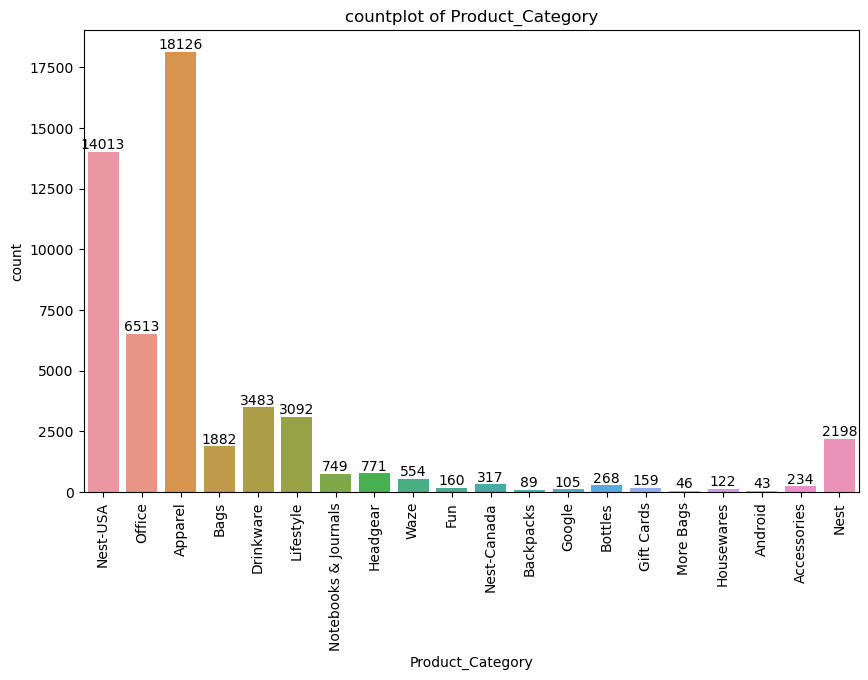

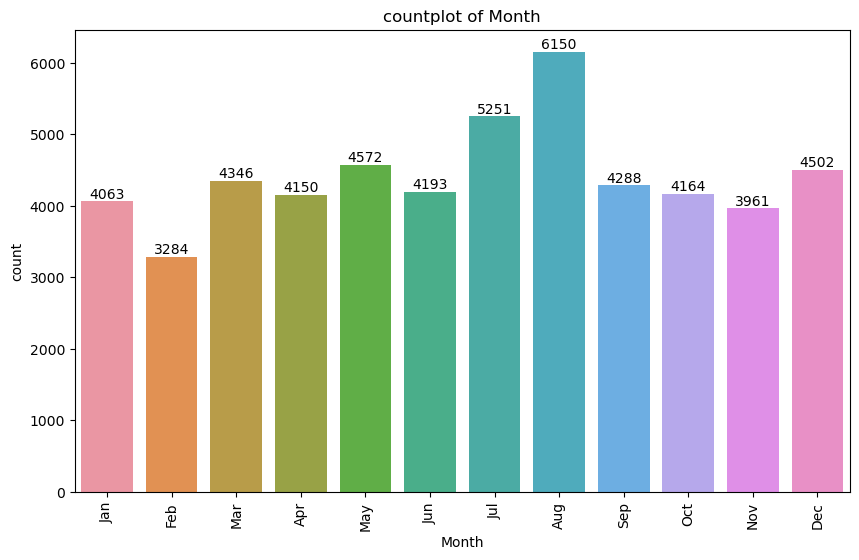

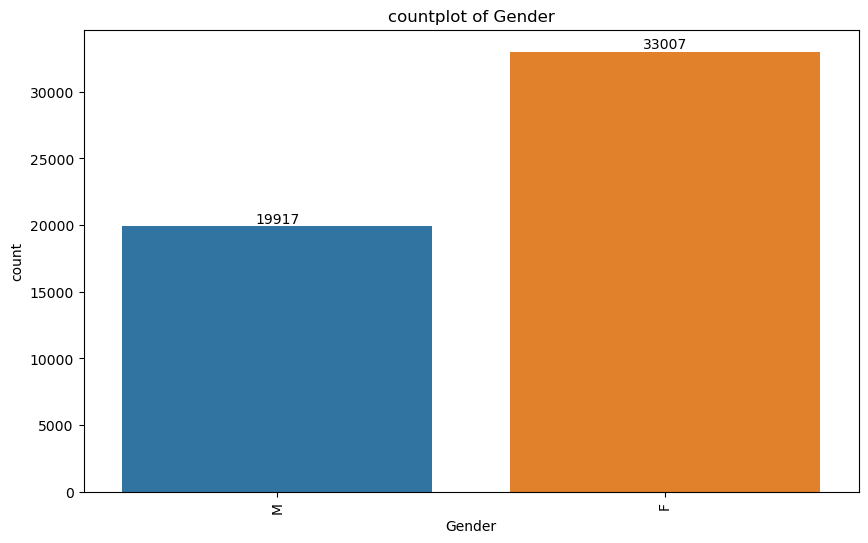

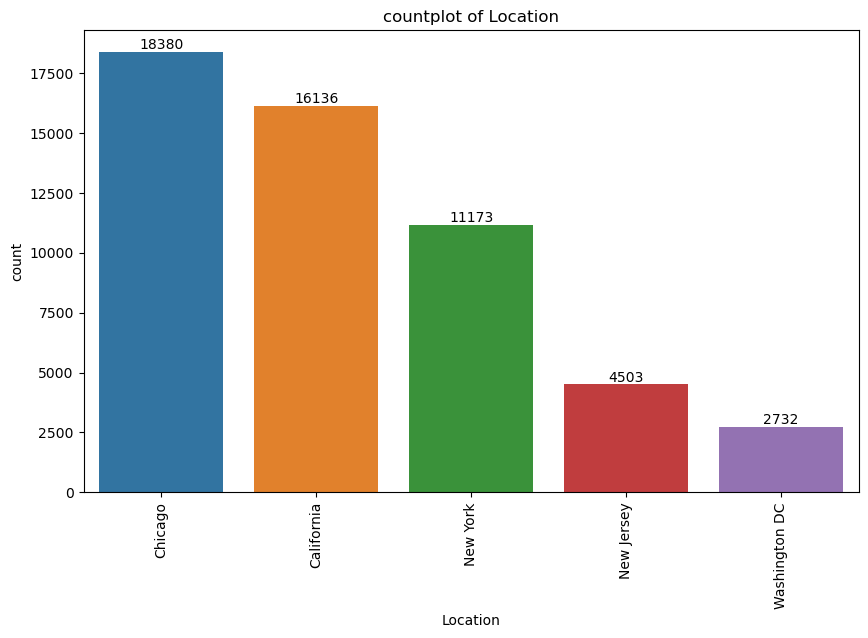

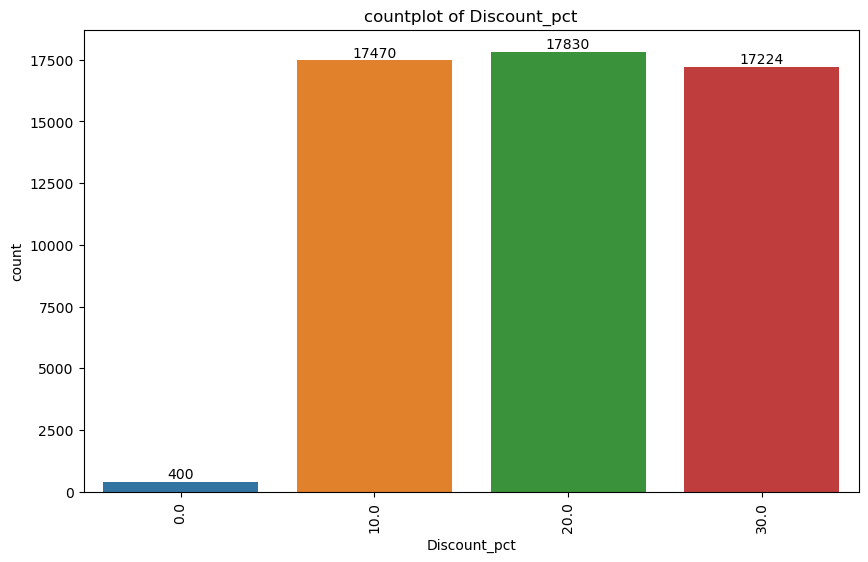

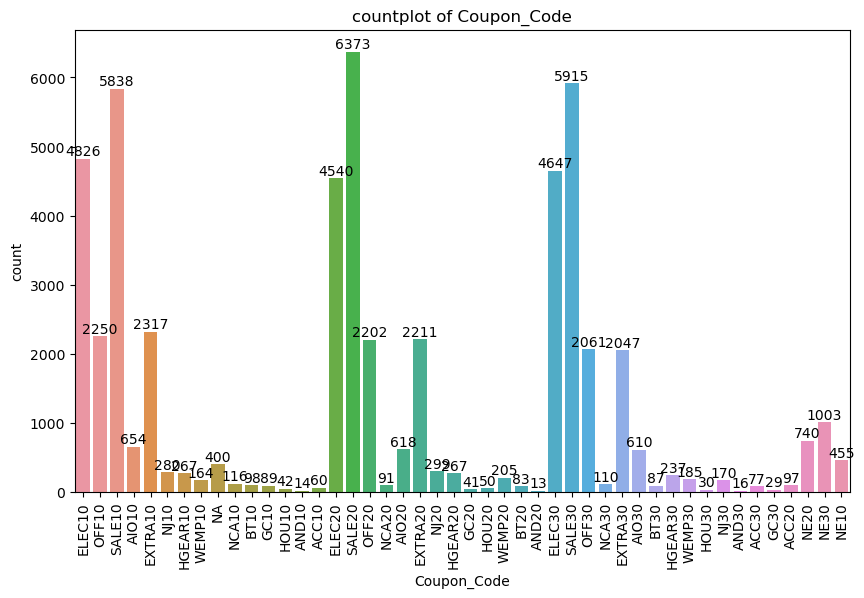

In [37]:
univirate=["Product_Category","Month","Gender","Location","Discount_pct","Coupon_Code"]
for i in univirate:
    plt.figure(figsize=(10,6))
    sns.countplot(data=final,x=i)
    plt.xticks(rotation=90)
    plt.title(f"countplot of {i}")
    ax=plt.gca()
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

    

Text(0.5, 1.0, 'Coupon Status Distru')

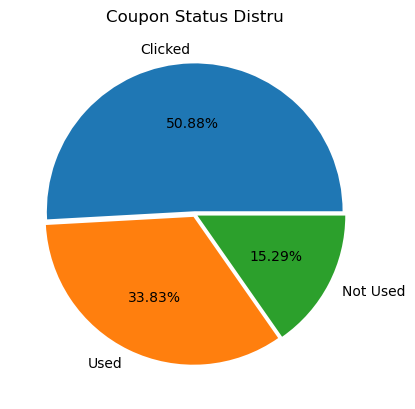

In [38]:
Coupon_Status_count=final['Coupon_Status'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.pie(Coupon_Status_count,autopct="%.2f%%",labels=Coupon_Status_count.index,colors=colors,explode=[0.02,.02,.02])
plt.title("Coupon Status Distru")

- Among the categories, Apparel (34%) and Nest-USA (24%) contributed to the most sales.
- The majority (66%) of customers preferred purchasing a single item.
- August saw the highest sales compared to other months.
- Coupon usage was recorded at 34%.
- The most popular coupon was 'sale20' used at 33.69%.
- Females made up a larger portion of the customers than males.
- Chicago and California had the most sales compared to other locations.

In [39]:
exp=final.copy()
exp.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02


# Bivariate Analysis

#### Gender vs Location

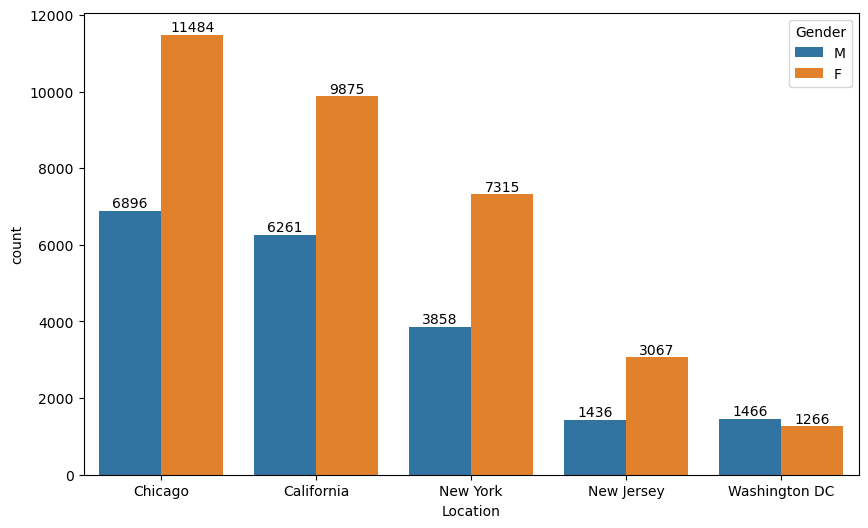

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=final,x='Location',hue='Gender')
ax = plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- Except for Washington D.C., all other locations have less male customers.

### Month vs Gender

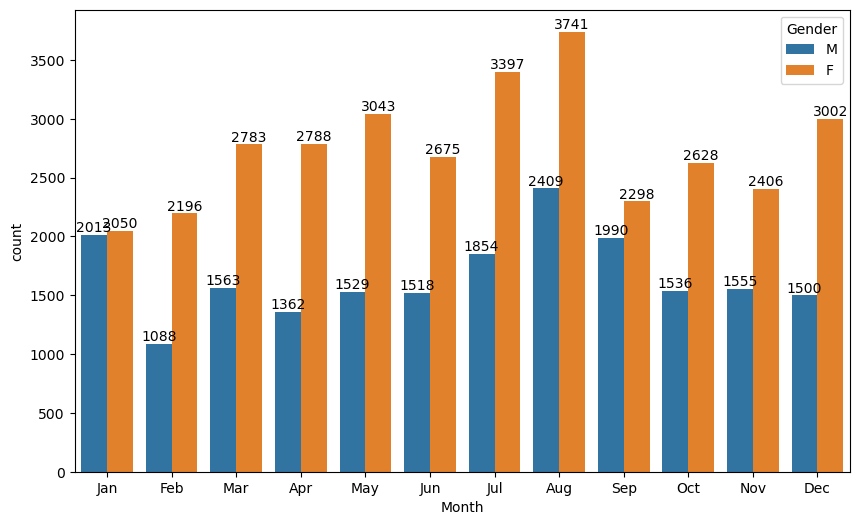

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(data=final,x='Month',hue='Gender')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- Except for January, all other months have fewer males.

### Coupon_Status vs Gender

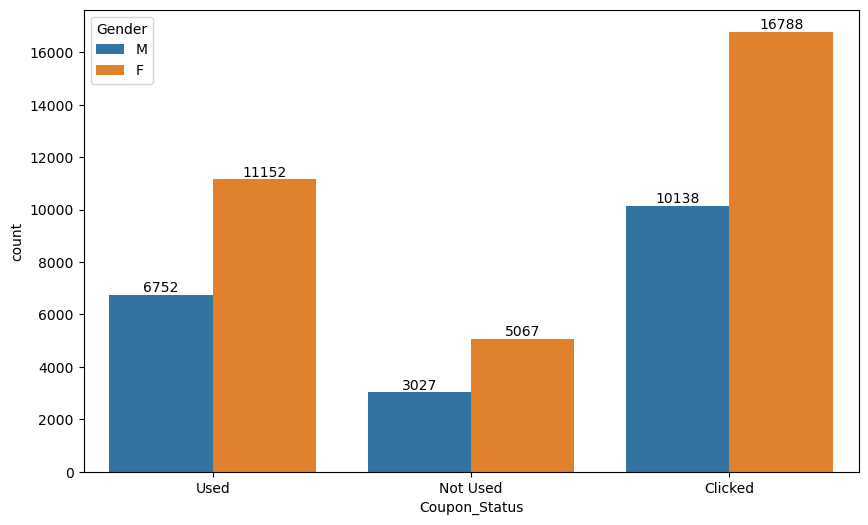

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=final,x='Coupon_Status',hue='Gender')
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- In coupon usage, females are ahead of males.

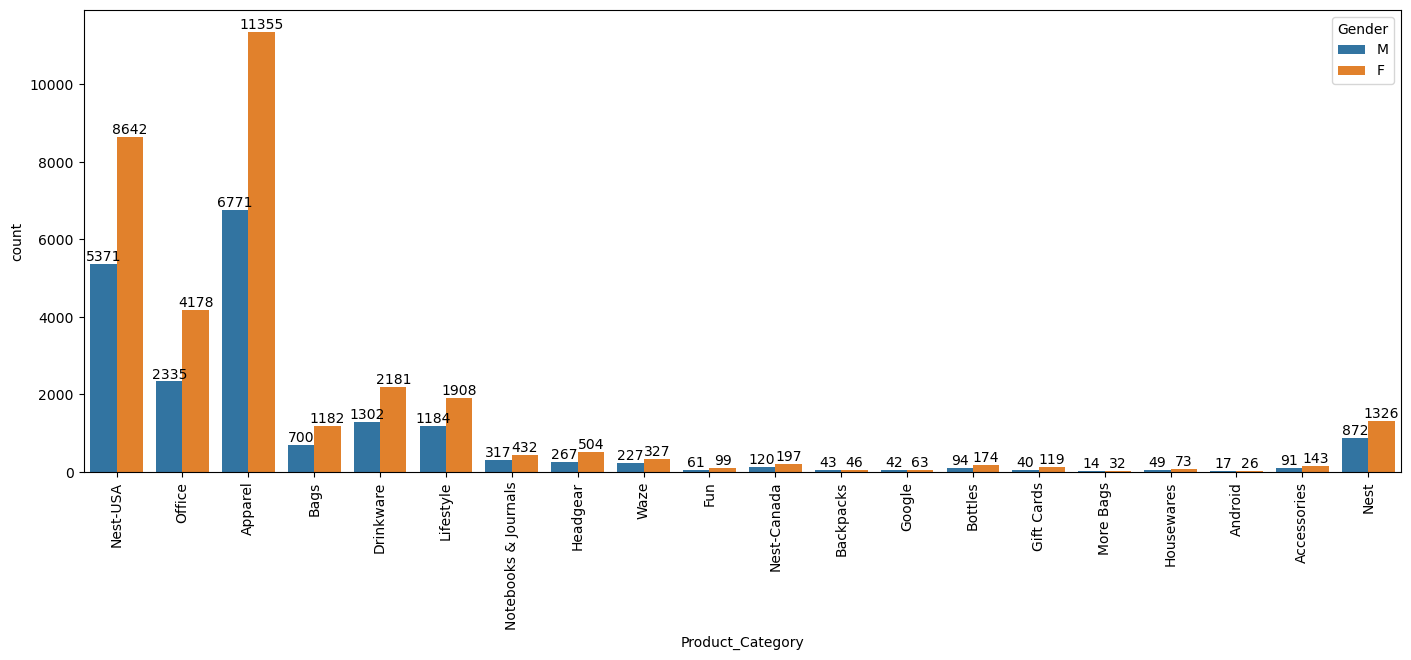

In [43]:
plt.figure(figsize=(17,6))
sns.countplot(data=final,x=final['Product_Category'],hue='Gender',)
plt.xticks(rotation=90)
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- In the product category, females are predominant.

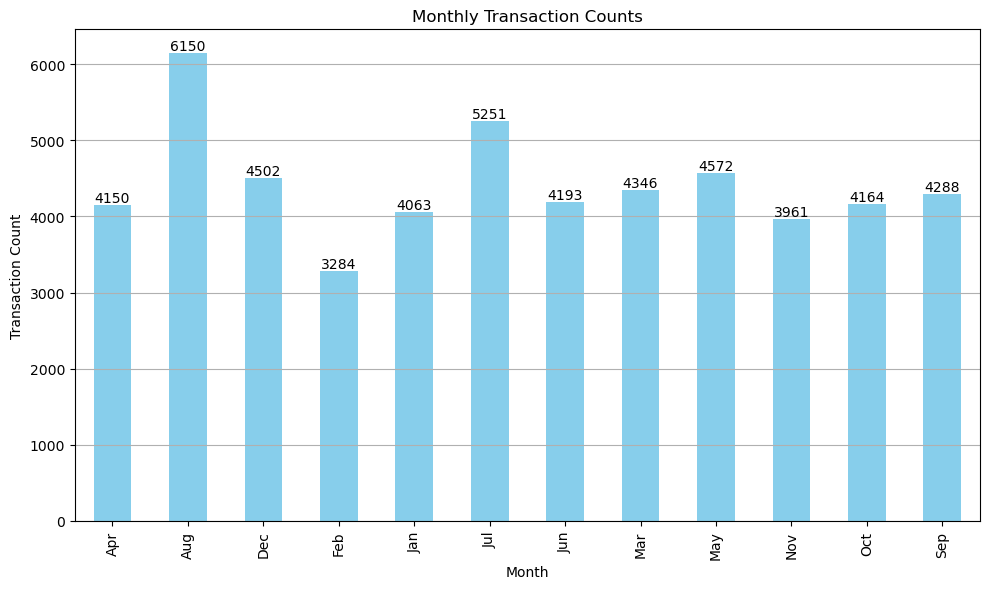

In [44]:
monthly_transaction_counts = final.groupby('Month')['Transaction_ID'].count()
plt.figure(figsize=(10, 6))
monthly_transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90) 
plt.grid(axis='y')
plt.tight_layout()
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


- Most transactions occur in December.

### Top 10 Most Purchase Products

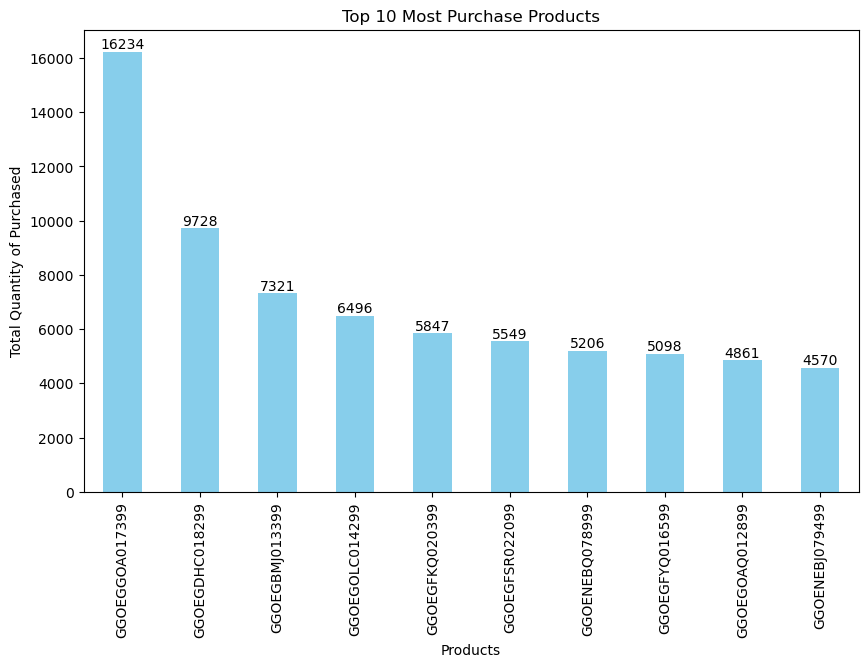

In [45]:
cat_quatity=final.groupby('Product_SKU')['Quantity'].sum()
top_10_cat=cat_quatity.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_cat.plot(kind="bar", color='skyblue')
plt.title("Top 10 Most Purchase Products")
plt.xlabel("Products")
plt.ylabel("Total Quantity of Purchased")
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- The product GGOEGGOA017399 has the highest number of purchases

## Customer Acquisition & Retention

#### Old customer vs New customer

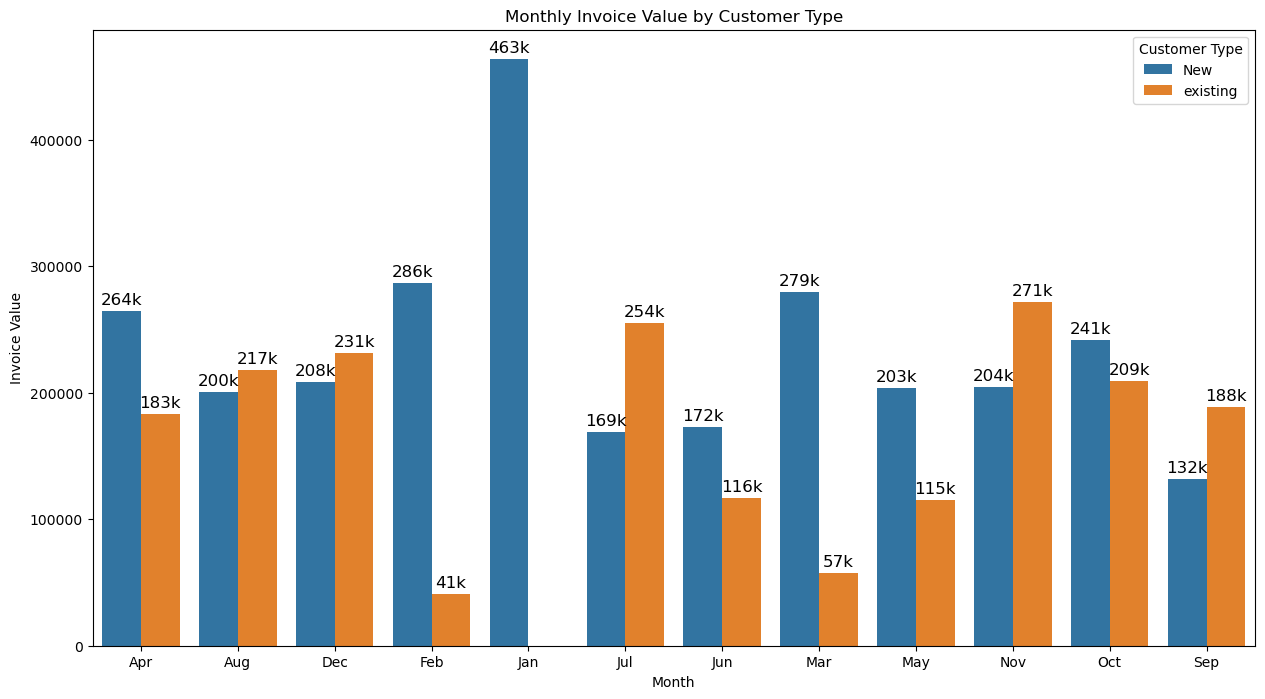

In [46]:
exp['first_transaction_date'] = exp.groupby('CustomerID')['Transaction_Date'].transform('min')
exp['transaction_month'] = exp['Transaction_Date'].dt.to_period('M')
exp['first_transaction_month'] = exp['first_transaction_date'].dt.to_period('M')
exp['Customer_type'] = exp.apply(lambda x: 'New' if x['transaction_month'] == x['first_transaction_month'] else 'existing', axis=1)

monthly_revenue = exp.groupby(['Month', 'Customer_type'])['Invoice Value'].sum()
monthly_revenue1 = monthly_revenue.reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=monthly_revenue1, x='Month', y='Invoice Value', hue='Customer_type')
ax=plt.gca()
for bar in ax.patches:
    height = bar.get_height()
    label = f'{int(height / 1000)}k' if not pd.isna(height) else '0k'
    ax.annotate(label,
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Invoice Value')
plt.title('Monthly Invoice Value by Customer Type')
plt.legend(title='Customer Type')
plt.show()


# count by month

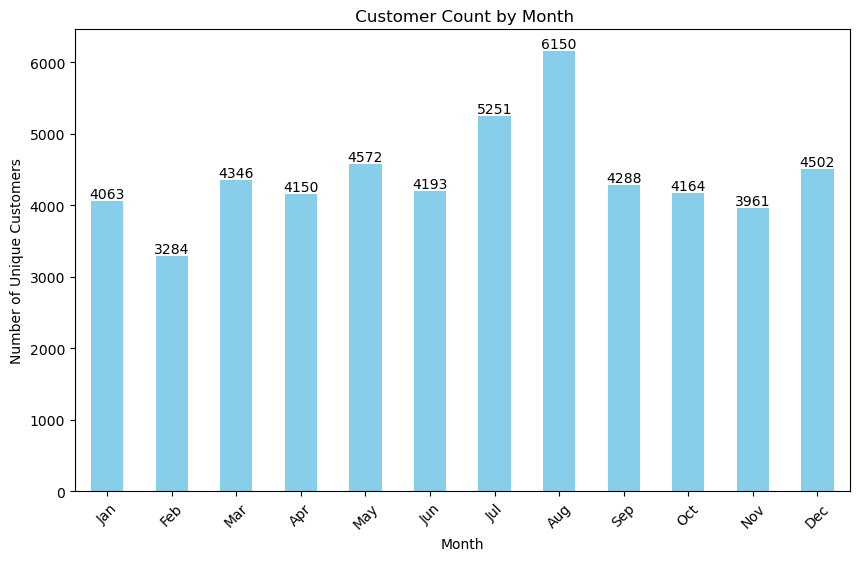

In [47]:
final['Month2'] = pd.to_datetime(final['Month'], format='%b')
customer_count_by_month = final.groupby('Month2')['CustomerID'].count()
plt.figure(figsize=(10,6))
customer_count_by_month.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax = plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(' Customer Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()


# Customer Acquisition by Month

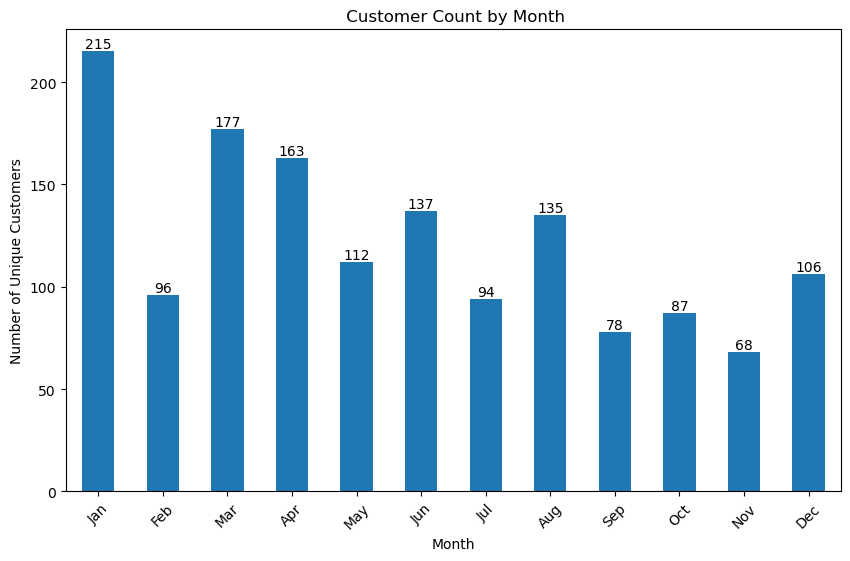

In [48]:
s=exp.groupby("first_transaction_month")['CustomerID'].nunique()
plt.figure(figsize=(10,6))
s.plot(kind="bar")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax = plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(' Customer Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()

### Customer Retention by month

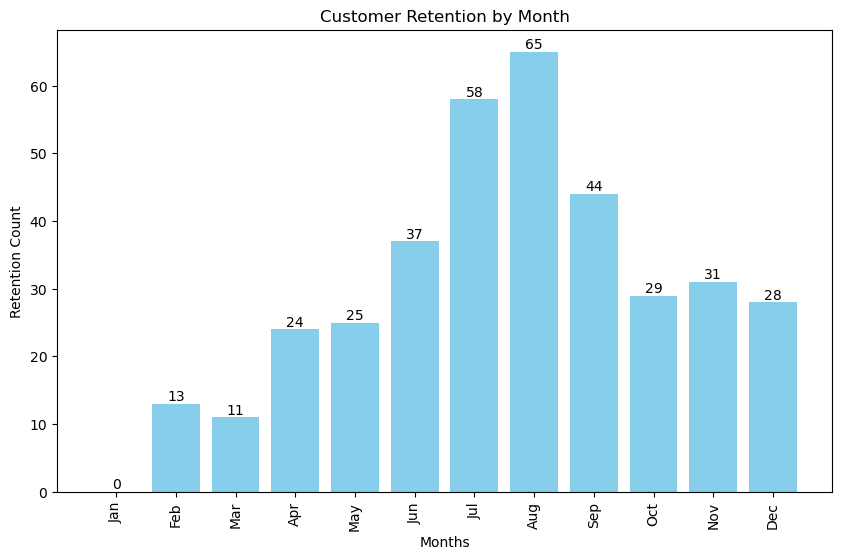

In [49]:
month_dict = {}
for i in final['Month'].unique():
   month_dict[i] = final[final['Month']==i]['CustomerID'].unique().tolist()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]])
  set2 = set(month_dict[months[i+1]])
  common_items = len(set1.intersection(set2))
  retention.append(common_items)

plt.figure(figsize=(10,6))
plt.bar(months, retention, color='skyblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=90)
ax = plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- The retention rate is high in July, August, and September

# Revenu by month

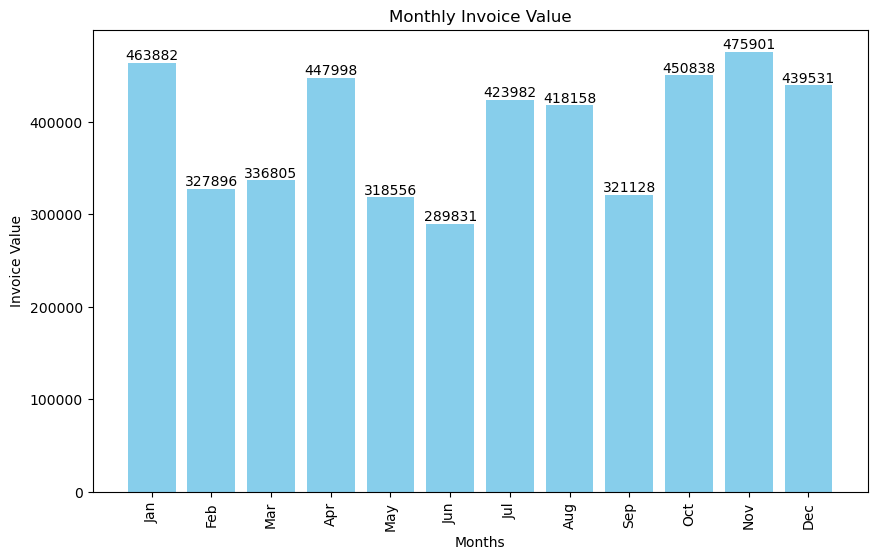

In [50]:
month_wise_revenue=final.groupby("Month")["Invoice Value"].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.figure(figsize=(10, 6))
plt.bar(month_wise_revenue.index, month_wise_revenue.values, color='skyblue')
plt.xlabel('Months')
plt.ylabel('Invoice Value')
plt.title('Monthly Invoice Value')
plt.xticks(rotation=90)
ax = plt.gca()
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


# Marketing Campaign Impact

In [51]:
ms.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


<Axes: ylabel='Offline_Spend'>

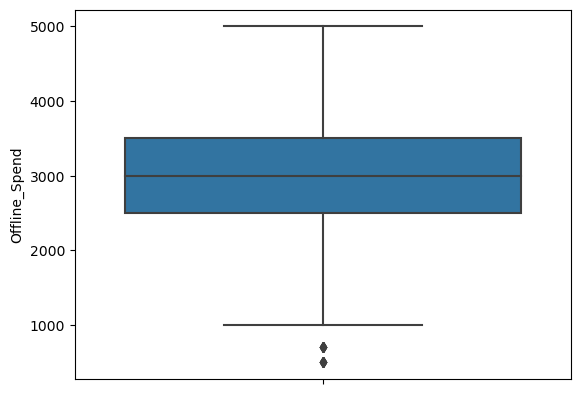

In [52]:
sns.boxplot(data=ms,y='Offline_Spend')

In [53]:
(ms['Offline_Spend'].quantile(.25),
ms['Offline_Spend'].quantile(.75))

(2500.0, 3500.0)

- The majority of offline spending is between 2500 and 3500.

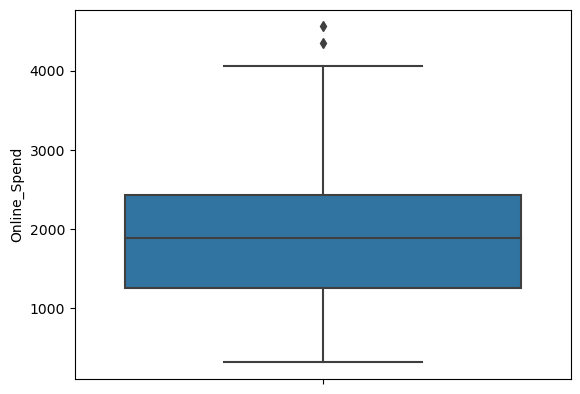

In [54]:
sns.boxplot(data=ms,y='Online_Spend')
ax=plt.gca()
for i in ax.containers:
    ax.bar_label(i)

In [55]:
(ms['Online_Spend'].quantile(.25),
ms['Online_Spend'].quantile(.75))

(1258.6, 2435.12)

- Most of the online spending is between 1258 and 435.

## Hypothesis testing

### Test 1

- Null(H0):There is no significance difference between the mean of offline spend and online spend
- Alternative (H1):There is significance difference between the mean of offline spend and online spend

In [56]:
alpha=0.05
s,p=ttest_ind(ms['Online_Spend'],ms['Offline_Spend'])
print(f"statistic value: {s} and p-value: {p}")
if p<alpha:
    print("Reject Null,There is significance difference between the mean of offline spend and online spend")
else:
    print("Fail to reject null,There is no significance difference between the mean of offline spend and online spend")

statistic value: -14.337872271632449 and p-value: 3.011705072303923e-41
Reject Null,There is significance difference between the mean of offline spend and online spend


- Here wew conclude that there is  significance difference between the mean of offline spend and online spend

### Test 2

- Null(H0):There is no sginificance difference between the mean of Male revenue  and female revenue
- Alternative (H1):There is sginificance difference between the mean of Male revenue  and female revenue

In [57]:
male =final[final["Gender"]=="M"]['Invoice Value']
female=final[final["Gender"]=="F"]['Invoice Value']

alpha=0.05
s,p=ttest_ind(male,female)
print(f"statistic value: {s} and p-value: {p}")
if p<alpha:
    print("Reject Null,There is sginificance difference between the mean of Male revenue  and female revenue")
else:
    print("Fail to reject null,There is no sginificance difference between the mean of Male revenue  and female revenue")

statistic value: 0.17201582058911902 and p-value: 0.8634257490902747
Fail to reject null,There is no sginificance difference between the mean of Male revenue  and female revenue


- Here we conclude that,There is no sginificance difference between the mean of Male revenue  and female revenue

## Test 3

- Null(H0):There is no significance difference  across the mean of all the location 
- Alternative(H1):There is significance difference  across the mean of all the location     

In [58]:
Chicago =final[final["Location"]=="Chicago"]['Invoice Value']
California =final[final["Location"]=="California"]['Invoice Value']
New_York =final[final["Location"]=="New York"]['Invoice Value']
New_Jersey =final[final["Location"]=="New Jersey"]['Invoice Value']
Washington_DC =final[final["Location"]=="Washington DC"]['Invoice Value']


alpha=0.05
s,p=f_oneway(Chicago,California,New_York,New_Jersey,Washington_DC)
print(f"statistic value: {s} and p-value: {p}")
if p<alpha:
    print("Reject Null,There is significance difference  across the mean of all the location  ")
else:
    print("Fail to reject null,There is no significance difference  across the mean of all the location ")

statistic value: 2.701953854090806 and p-value: 0.02882189631217692
Reject Null,There is significance difference  across the mean of all the location  


- Therefore we conclue that There is significance difference  across the mean of all the location

In [59]:
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Month2
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,1900-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,1900-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,1900-01-01


### Test 4

In [60]:
final['Coupon_Status'].value_counts()

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

- Null(H0):There is no significance difference  across the mean of various coupon status 
- Alternative(H1):There is significance difference  across the mean of various coupon status    

In [61]:
Clicked =final[final["Coupon_Status"]=="Clicked"]['Invoice Value']
Used =final[final["Coupon_Status"]=="Used"]['Invoice Value']
Not_Used =final[final["Coupon_Status"]=="Not Used"]['Invoice Value']

alpha=0.05
s,p=kruskal(Clicked,Used,Not_Used)
print(f"statistic value: {s} and p-value: {p}")
if p<alpha:
    print("Reject Null,There is significance difference across the mean of various coupon status")
else:
    print("Fail to reject null,there is no significance difference across the mean of various coupon status")

statistic value: 1.709922299041085 and p-value: 0.4252997138591098
Fail to reject null,there is no significance difference across the mean of various coupon status


- Here we conclude that, there is no significance difference across the mean of various coupon status

# RFM Analysis

In [62]:
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Month2
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,1900-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,1900-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,1900-01-01


In [63]:
current_date=pd.to_datetime('2019-12-31')
segmentation=final.groupby("CustomerID").agg({'Transaction_Date':lambda x:(current_date-x.max()).days,
                                             'Transaction_ID':'count',
                                             'Invoice Value':'sum'})
segmentation.rename(columns = {'Transaction_Date':'Recency', 'Transaction_ID':'Frequency', 'Invoice Value':'Monetory'}, inplace = True)
segmentation.reset_index(inplace=True)

# fro Recency_bin
bins = [0,40,120,220,300,500]
labels = [1,2,3,4,5]
segmentation['recency_bin'] = pd.cut(segmentation['Recency'], bins = bins, labels = labels,right=False)

# for Frequency_bin
bins = [0,15,35,60,85,900]
labels = [5,4,3,2,1]
segmentation['frequency_bin'] = pd.cut(segmentation['Frequency'], bins = bins, labels = labels,right=False)

# for Monetry Bin
bins = [0,2000,3500,5000,7000,90000]
labels = [5,4,3,2,1]
segmentation['monetory_bin'] = pd.cut(segmentation['Monetory'], bins = bins, labels = labels,right=False)

#Converitng into int
segmentation['recency_bin'] = segmentation['recency_bin'].astype('int')
segmentation['frequency_bin'] = segmentation['frequency_bin'].astype('int')
segmentation['monetory_bin'] = segmentation['monetory_bin'].astype('int')

segmentation['RFM'] = segmentation['recency_bin'] + segmentation['frequency_bin'] + segmentation['monetory_bin']

def rfm_analysis(rfm):
    if rfm >= 11:
        return 'Premium'
    elif rfm > 5 and rfm < 11:
        return 'Gold'
    else:
        return 'Silver'


In [64]:
segmentation['Customer_segmentation'] = segmentation['RFM'].apply(rfm_analysis)
segmentation

,CustomerID,Recency,Frequency,Monetory,recency_bin,frequency_bin,monetory_bin,RFM,Customer_segmentation
0,12346,107,2,174.98,2,5,5,12,Premium
1,12347,59,60,12090.30,2,2,1,5,Silver
2,12348,73,23,1501.90,2,4,5,11,Premium
3,12350,17,17,1183.72,1,4,5,10,Gold
4,12356,107,36,1753.42,2,3,5,10,Gold
...,...,...,...,...,...,...,...,...,...
1463,18259,270,7,816.43,4,5,5,14,Premium
1464,18260,87,40,2647.24,2,3,4,9,Gold
1465,18269,194,8,155.66,3,5,5,13,Premium
1466,18277,69,1,301.02,2,5,5,12,Premium


In [65]:
df=segmentation[['CustomerID','Customer_segmentation']]
final2=pd.merge(final,df,on='CustomerID',how='left')
final2.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Month2,Customer_segmentation
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01,Gold
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01,Gold
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,1900-01-01,Gold
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,1900-01-01,Gold
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,1900-01-01,Gold


# Discount Analysis

### Impact of Discount on Average  Order Value

In [66]:
aov_with_discount_30 = final[final['Discount_pct'] == 30.0]['Invoice Value'].mean()
aov_with_discount_20 = final[final['Discount_pct'] == 20.0]['Invoice Value'].mean()
aov_with_discount_10 = final[final['Discount_pct'] == 10.0]['Invoice Value'].mean()
aov_with_discount_0 = final[final['Discount_pct'] == 0.0]['Invoice Value'].mean()

# Printing the results
print(f"AOV using 30% discount is {round(aov_with_discount_30,2)}")
print(f"AOV using 20% discount is {round(aov_with_discount_20,2)}")
print(f"AOV using 10% discount is {round(aov_with_discount_10,2)}")
print(f"AOV without discount is {round(aov_with_discount_0,2)}")

AOV using 30% discount is 79.98
AOV using 20% discount is 85.76
AOV using 10% discount is 101.36
AOV without discount is 92.37


# Discount impacting on revenue


In [67]:
gold_with_discount_30 = final2[(final2['Discount_pct'] == 30.0) & (final2['Customer_segmentation'] == 'Gold')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Gold']['CustomerID'].count() * 100
gold_with_discount_20 = final2[(final2['Discount_pct'] == 20.0) & (final2['Customer_segmentation'] == 'Gold')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Gold']['CustomerID'].count() * 100
gold_with_discount_10 = final2[(final2['Discount_pct'] == 10.0) & (final2['Customer_segmentation'] == 'Gold')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Gold']['CustomerID'].count() * 100
gold_with_discount_0 = final2[(final2['Discount_pct'] == 0.0) & (final2['Customer_segmentation'] == 'Gold')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Gold']['CustomerID'].count() * 100

print(f"Gold segment customer with 30% discount: {round(gold_with_discount_30, 2)}")
print(f"Gold segment customer with 20% discount: {round(gold_with_discount_20, 2)}")
print(f"Gold segment customer with 10% discount: {round(gold_with_discount_10, 2)}")
print(f"Gold segment customer with 0% discount: {round(gold_with_discount_0, 2)}")


Gold segment customer with 30% discount: 32.95
Gold segment customer with 20% discount: 33.29
Gold segment customer with 10% discount: 32.98
Gold segment customer with 0% discount: 0.78


In [68]:
silver_with_discount_30 = final2[(final2['Discount_pct'] == 30.0) & (final2['Customer_segmentation'] == 'Silver')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Silver']['CustomerID'].count() * 100
silver_with_discount_20 = final2[(final2['Discount_pct'] == 20.0) & (final2['Customer_segmentation'] == 'Silver')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Silver']['CustomerID'].count() * 100
silver_with_discount_10 = final2[(final2['Discount_pct'] == 10.0) & (final2['Customer_segmentation'] == 'Silver')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Silver']['CustomerID'].count() * 100
silver_with_discount_0 = final2[(final2['Discount_pct'] == 0.0) & (final2['Customer_segmentation'] == 'Silver')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Silver']['CustomerID'].count() * 100

print(f"Silver segment with 30% discount: {round(silver_with_discount_30, 2)}")
print(f"Silver segment with 20% discount: {round(silver_with_discount_20, 2)}")
print(f"Silver segment with 10% discount: {round(silver_with_discount_10, 2)}")
print(f"Silver segment with 0% discount: {round(silver_with_discount_0, 2)}")


Silver segment with 30% discount: 31.68
Silver segment with 20% discount: 35.12
Silver segment with 10% discount: 32.47
Silver segment with 0% discount: 0.73


In [69]:
premium_with_discount_30 = final2[(final2['Discount_pct'] == 30.0) & (final2['Customer_segmentation'] == 'Premium')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Premium']['CustomerID'].count() * 100
premium_with_discount_20 = final2[(final2['Discount_pct'] == 20.0) & (final2['Customer_segmentation'] == 'Premium')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Premium']['CustomerID'].count() * 100
premium_with_discount_10 = final2[(final2['Discount_pct'] == 10.0) & (final2['Customer_segmentation'] == 'Premium')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Premium']['CustomerID'].count() * 100
premium_with_discount_0 = final2[(final2['Discount_pct'] == 0.0) & (final2['Customer_segmentation'] == 'Premium')]['CustomerID'].count() / final2[final2['Customer_segmentation'] == 'Premium']['CustomerID'].count() * 100

print(f"Premium segment with 30% discount: {round(premium_with_discount_30, 2)}%")
print(f"Premium segment with 20% discount: {round(premium_with_discount_20, 2)}%")
print(f"Premium segment with 10% discount: {round(premium_with_discount_10, 2)}%")
print(f"Premium segment with 0% discount: {round(premium_with_discount_0, 2)}%")


Premium segment with 30% discount: 33.22%
Premium segment with 20% discount: 32.05%
Premium segment with 10% discount: 33.97%
Premium segment with 0% discount: 0.75%


In [70]:
final.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Month2
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,1900-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,1900-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,1900-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,1900-01-01


# Seasonality & Trends

Month
Apr    447998.27
Aug    418158.14
Dec    439531.46
Feb    327896.25
Jan    463881.87
Jul    423981.63
Jun    289831.04
Mar    336805.27
May    318556.12
Nov    475901.17
Oct    450838.47
Sep    321128.14
Name: Invoice Value, dtype: float64


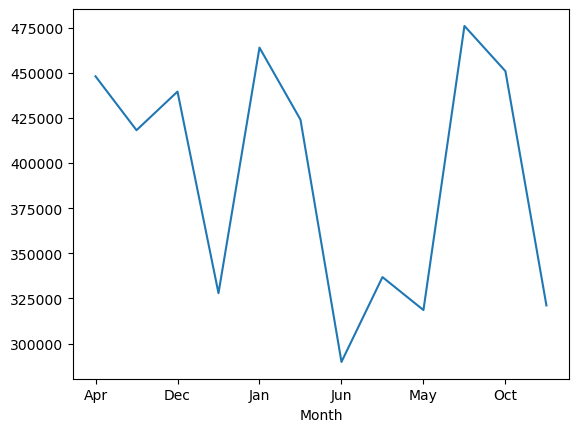

In [71]:
# month wise highest Revenue
month=final2.groupby('Month')['Invoice Value'].sum()
print(month)
month.plot()
plt.show()

In [72]:
# Week wise highest Revenue
final2['week']=pd.to_datetime(final2['Transaction_Date']).dt.strftime("%Y-%U")
top_weeks=final2.groupby("week")['Invoice Value'].sum()
top_weeks.nlargest(5)

week
2019-47    148842.57
2019-15    129306.23
2019-50    126055.23
2019-28    123184.03
2019-30    120746.53
Name: Invoice Value, dtype: float64

In [73]:
# Day wise Revenue
final2['Day']=pd.to_datetime(final2['Transaction_Date']).dt.date
top_weeks=final2.groupby("Day")['Invoice Value'].sum()
top_weeks.nlargest(5)

Day
2019-04-05    56753.03
2019-04-18    50158.96
2019-11-27    49267.73
2019-07-18    39867.30
2019-08-02    37138.37
Name: Invoice Value, dtype: float64

In [74]:
final2.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,...,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Month2,Customer_segmentation,week,Day
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,...,10.0,10.0,M,Chicago,12,158.67,1900-01-01,Gold,2019-00,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,...,10.0,10.0,M,Chicago,12,158.67,1900-01-01,Gold,2019-00,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,...,10.0,10.0,M,Chicago,12,8.53,1900-01-01,Gold,2019-00,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,...,10.0,18.0,M,Chicago,12,99.58,1900-01-01,Gold,2019-00,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,...,10.0,18.0,M,Chicago,12,24.02,1900-01-01,Gold,2019-00,2019-01-01


# key performance indicators (KPIs)

#### Revenue by Product Category, month,week,day

In [75]:
print('Top 5 Product_Category by revenue')
revenue_cat=final2.groupby('Product_Category')['Invoice Value'].sum()
print(revenue_cat.nlargest(5))
print()
print("_______________________________________________________________")

print('Top 5 Month by revenue')
revenue_month=final2.groupby('Month')['Invoice Value'].sum()
print(revenue_month.nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Week by revenue')
revenue_week=final2.groupby('week')['Invoice Value'].sum()
print(revenue_week.nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Day by revenue')
revenue_Day=final2.groupby('Day')['Invoice Value'].sum()
print(revenue_Day.nlargest(5))
print()
print("_______________________________________________________________")
print()


Top 5 Product_Category by revenue
Product_Category
Nest-USA     2351314.07
Apparel       735448.41
Nest          439979.13
Office        343998.29
Drinkware     240267.79
Name: Invoice Value, dtype: float64

_______________________________________________________________
Top 5 Month by revenue
Month
Nov    475901.17
Jan    463881.87
Oct    450838.47
Apr    447998.27
Dec    439531.46
Name: Invoice Value, dtype: float64

_______________________________________________________________

Top 5 Week by revenue
week
2019-47    148842.57
2019-15    129306.23
2019-50    126055.23
2019-28    123184.03
2019-30    120746.53
Name: Invoice Value, dtype: float64

_______________________________________________________________

Top 5 Day by revenue
Day
2019-04-05    56753.03
2019-04-18    50158.96
2019-11-27    49267.73
2019-07-18    39867.30
2019-08-02    37138.37
Name: Invoice Value, dtype: float64

_______________________________________________________________



# Number of orders by Product Category, month,week,day

In [76]:
print('Top 5 Product_Category by No of Orders')
no_of_Orders_cat=final2.groupby('Product_Category')['Transaction_ID'].count()
print(no_of_Orders_cat.nlargest(5))
print()
print("_______________________________________________________________")

print('Top 5 Month by No of Orders')
no_of_Orders_month=final2.groupby('Month')['Transaction_ID'].count()
print(no_of_Orders_month.nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Week by No of Orders')
no_of_Orders_week=final2.groupby('week')['Transaction_ID'].count()
print(no_of_Orders_week.nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Day by No of Orders')
No_of_Orders_Day=final2.groupby('Day')['Transaction_ID'].count()
print(No_of_Orders_Day.nlargest(5))
print()
print("_______________________________________________________________")
print()


Top 5 Product_Category by No of Orders
Product_Category
Apparel      18126
Nest-USA     14013
Office        6513
Drinkware     3483
Lifestyle     3092
Name: Transaction_ID, dtype: int64

_______________________________________________________________
Top 5 Month by No of Orders
Month
Aug    6150
Jul    5251
May    4572
Dec    4502
Mar    4346
Name: Transaction_ID, dtype: int64

_______________________________________________________________

Top 5 Week by No of Orders
week
2019-30    1515
2019-28    1413
2019-32    1392
2019-31    1358
2019-34    1343
Name: Transaction_ID, dtype: int64

_______________________________________________________________

Top 5 Day by No of Orders
Day
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
Name: Transaction_ID, dtype: int64

_______________________________________________________________



# Aaverage order value by Product Category, month,week,day

In [77]:
print('Top 5 Product_Category by AOV')
avg_order_value_by_category=revenue_cat/no_of_Orders_cat
print(round(avg_order_value_by_category,2).nlargest(5))
print()
print("_______________________________________________________________")

print('Top 5 Month by AOV')
avg_order_value_by_month=revenue_month/no_of_Orders_month
print(round(avg_order_value_by_month,2).nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Week by AOV')
avg_order_value_by_week=revenue_week/no_of_Orders_week
print(round(avg_order_value_by_week,2).nlargest(5))
print()
print("_______________________________________________________________")
print()

print('Top 5 Day by AOV')
avg_order_value_by_day=revenue_Day/No_of_Orders_Day
print(round(avg_order_value_by_day,2).nlargest(5))
print()
print("_______________________________________________________________")
print()


Top 5 Product_Category by AOV
Product_Category
Nest-Canada             206.77
Nest                    200.17
Nest-USA                167.80
Notebooks & Journals    146.02
Google                  125.42
dtype: float64

_______________________________________________________________
Top 5 Month by AOV
Month
Nov    120.15
Jan    114.17
Oct    108.27
Apr    107.95
Feb     99.85
dtype: float64

_______________________________________________________________

Top 5 Week by AOV
week
2019-47    130.45
2019-13    124.45
2019-46    123.50
2019-15    121.30
2019-41    119.90
dtype: float64

_______________________________________________________________

Top 5 Day by AOV
Day
2019-04-05    298.70
2019-04-18    192.18
2019-10-16    175.28
2019-07-01    174.51
2019-01-28    166.39
dtype: float64

_______________________________________________________________



# Marketing Spend & Revenue

In [78]:
ms['Date'] = pd.to_datetime(ms['Date'], format='%m/%d/%Y')
ms['Month']= pd.to_datetime(ms['Date']).dt.strftime("%b")
ms['Total_spend']=ms['Offline_Spend']+ms['Online_Spend']

x = ms.groupby('Month')['Total_spend'].sum().reset_index()
y = final2.groupby('Month')['Invoice Value'].sum().reset_index()
z = final2.groupby('Month')['Discount_pct'].mean().reset_index()
deli_charg = final2.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
# result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

market_spend_corr=result.corr(numeric_only=True)
market_spend_corr

,Total_spend,Invoice Value,Discount_pct,Delivery_Charges
Total_spend,1.000000,0.614748,0.044452,-0.325481
Invoice Value,0.614748,1.000000,-0.619476,0.024394
Discount_pct,0.044452,-0.619476,1.000000,-0.206736
Delivery_Charges,-0.325481,0.024394,-0.206736,1.000000


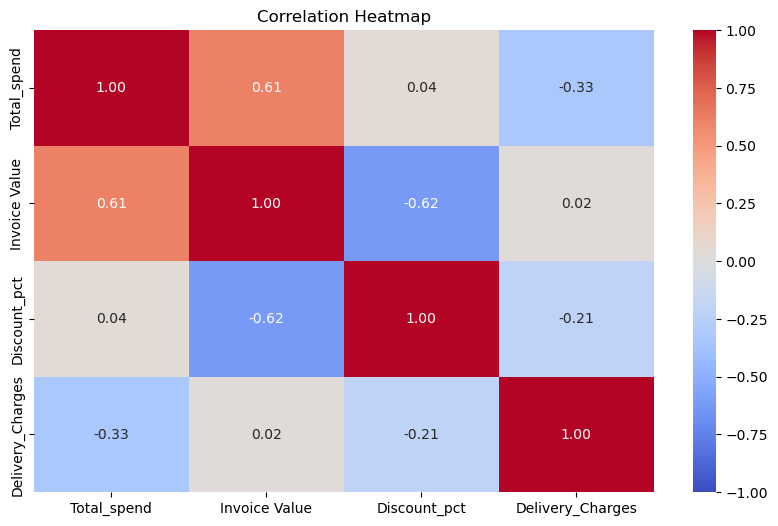

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(market_spend_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Product & Customer Relationships (Market basket analysis)

In [80]:
x=final2['Product_Category'].value_counts().sort_values(ascending=False)[:10]

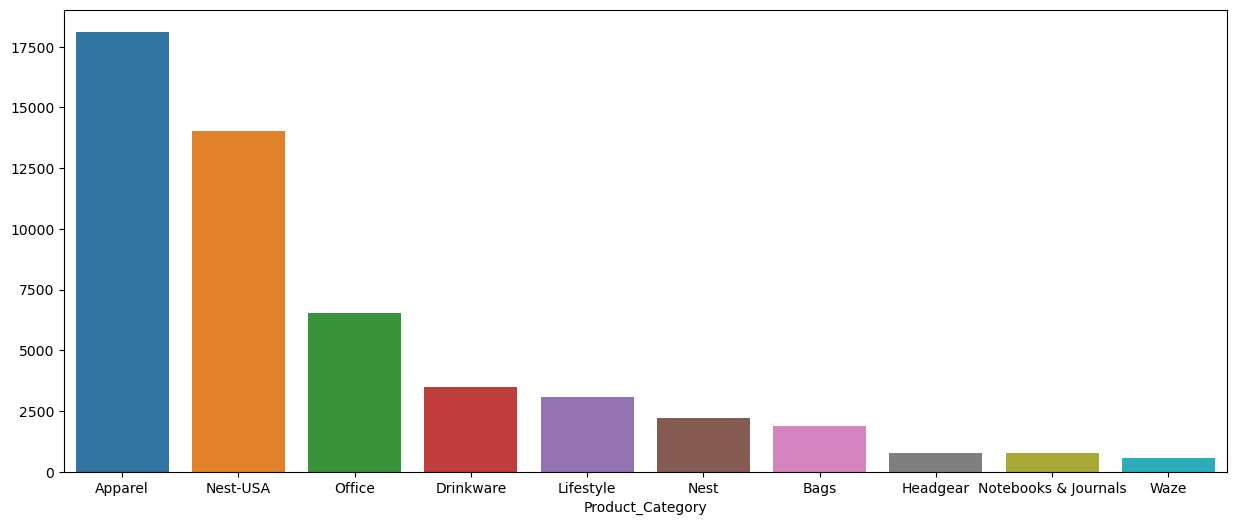

In [81]:
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x.values)
plt.show()

#### By Apriori Algorithum

In [82]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [83]:
Basket = final2.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

In [84]:
Basket

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16682,0.0,0.0,10.0,0.0,16.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
# Encoding
Basket[Basket > 0] = 1
Basket

Product_Category,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16682,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [86]:
frequent_item=apriori(Basket,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_item,metric='lift',min_threshold=.05)

C:\Users\CHETAN\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [87]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
1,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
2,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
3,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
4,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864


In [88]:
frequent_item['itemsets']

0                (Apparel)
1                   (Bags)
2              (Drinkware)
3              (Lifestyle)
4                   (Nest)
5               (Nest-USA)
6                 (Office)
7     (Apparel, Drinkware)
8     (Apparel, Lifestyle)
9        (Apparel, Office)
10     (Office, Drinkware)
11     (Office, Lifestyle)
Name: itemsets, dtype: object

##### Customers are buying the following product categories together: 
- Apparel and Drinkware 
- Lifestyle and Apparel
- Apparel and Office
- Office and Drinkware 
- Lifestyle and Office

# Customer Lifetime Value (CLTV):

In [90]:
max_date=final2['Transaction_Date'].max()
df=final2.groupby('CustomerID').agg(
    {'Transaction_Date':lambda x:(max_date-x.min()).days,
     'Transaction_ID':lambda x: len(x),
     'Quantity': lambda x: x.sum(),
     'Invoice Value': lambda x: x.sum()})
df.head()

,Transaction_Date,Transaction_ID,Quantity,Invoice Value
CustomerID,,,,
12346,107,2,3,174.98
12347,282,60,342,12090.30
12348,192,23,209,1501.90
12350,17,17,21,1183.72
12356,107,36,56,1753.42


In [91]:
df.columns=['age','No_of_tran','Quantity','total_revenue']
df=df[df['Quantity']>0]
df.head()

,age,No_of_tran,Quantity,total_revenue
CustomerID,,,,
12346,107,2,3,174.98
12347,282,60,342,12090.30
12348,192,23,209,1501.90
12350,17,17,21,1183.72
12356,107,36,56,1753.42


In [92]:
df['AVO']=df['total_revenue']/df['No_of_tran']
df.head()

,age,No_of_tran,Quantity,total_revenue,AVO
CustomerID,,,,,
12346,107,2,3,174.98,87.490000
12347,282,60,342,12090.30,201.505000
12348,192,23,209,1501.90,65.300000
12350,17,17,21,1183.72,69.630588
12356,107,36,56,1753.42,48.706111


In [93]:
pruchase_fre=sum(df['No_of_tran'])/len(df)
pruchase_fre

36.05177111716621

In [94]:
#repeat rate
repeat_rate = round(df[df['No_of_tran'] > 1].shape[0]/df.shape[0],2)
repeat_rate

0.96

In [95]:
# chrun rate
churn_rate = 1-repeat_rate
churn_rate

0.040000000000000036

In [96]:
df['Profit_Margin'] = df['total_revenue']*0.1
df.head()

,age,No_of_tran,Quantity,total_revenue,AVO,Profit_Margin
CustomerID,,,,,,
12346,107,2,3,174.98,87.490000,17.498
12347,282,60,342,12090.30,201.505000,1209.030
12348,192,23,209,1501.90,65.300000,150.190
12350,17,17,21,1183.72,69.630588,118.372
12356,107,36,56,1753.42,48.706111,175.342


In [97]:
df['CLTV'] = round(((df['AVO']*pruchase_fre)/churn_rate)*0.10,2)
df.head()

,age,No_of_tran,Quantity,total_revenue,AVO,Profit_Margin,CLTV
CustomerID,,,,,,,
12346,107,2,3,174.98,87.490000,17.498,7885.42
12347,282,60,342,12090.30,201.505000,1209.030,18161.53
12348,192,23,209,1501.90,65.300000,150.190,5885.45
12350,17,17,21,1183.72,69.630588,118.372,6275.77
12356,107,36,56,1753.42,48.706111,175.342,4389.85


In [98]:
cltv=df.sort_values('CLTV', ascending = False).head(10)

In [99]:
cltv


,age,No_of_tran,Quantity,total_revenue,AVO,Profit_Margin,CLTV
CustomerID,,,,,,,
13929,109,3,157,2213.20,737.733333,221.320,66491.48
15070,346,1,103,541.15,541.150000,54.115,48773.54
13531,268,15,199,6995.54,466.369333,699.554,42033.60
15845,152,13,373,5155.75,396.596154,515.575,35744.98
15351,323,53,2160,19496.50,367.858491,1949.650,33154.88
16553,270,18,265,6307.05,350.391667,630.705,31580.60
15380,256,1,7,349.44,349.440000,34.944,31494.83
14457,20,4,106,1347.49,336.872500,134.749,30362.13
13113,271,62,2494,20767.65,334.962097,2076.765,30189.94


# Cohort Analysis


In [116]:
data=final2.copy()

In [117]:
data.drop(columns=["Month2","week","Day"],inplace=True)

In [118]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month,1)

data['InvoiceMonth'] = data['Transaction_Date'].apply(get_month)
data.tail()                                                 

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Customer_segmentation,InvoiceMonth
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,30.0,10.0,F,New York,45,99.90,Premium,2019-12-01
52920,14410,48494,2019-12-31,GGOEGAEB091117,Apparel,1,48.92,6.50,Used,Dec,SALE30,30.0,18.0,F,New York,45,46.91,Premium,2019-12-01
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,30.0,10.0,F,New York,45,123.45,Premium,2019-12-01
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,30.0,10.0,F,California,7,316.50,Premium,2019-12-01
52923,14600,48497,2019-12-31,GGOENEBQ079099,Nest-USA,4,80.52,19.99,Clicked,Dec,ELEC30,30.0,10.0,F,California,7,267.99,Premium,2019-12-01


In [119]:
#create a column index with the minimum invoice date aka first time customer was acquired
data['Cohort Month'] =  data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(30)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Customer_segmentation,InvoiceMonth,Cohort Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,Gold,2019-01-01,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,Gold,2019-01-01,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.50,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,Gold,2019-01-01,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,Gold,2019-01-01,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.50,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,Gold,2019-01-01,2019-01-01
5,17850,16682,2019-01-01,GGOEGBMJ013399,Bags,15,5.15,6.50,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,88.54,Gold,2019-01-01,2019-01-01
6,17850,16682,2019-01-01,GGOEGDHC018299,Drinkware,15,3.08,6.50,Not Used,Jan,EXTRA10,10.0,18.0,M,Chicago,12,55.56,Gold,2019-01-01,2019-01-01
7,17850,16682,2019-01-01,GGOEGDHG014499,Drinkware,15,10.31,6.50,Clicked,Jan,EXTRA10,10.0,18.0,M,Chicago,12,170.74,Gold,2019-01-01,2019-01-01
8,17850,16682,2019-01-01,GGOEGDWC020199,Drinkware,5,9.27,6.50,Used,Jan,EXTRA10,10.0,18.0,M,Chicago,12,55.72,Gold,2019-01-01,2019-01-01
9,13047,16682,2019-01-01,GGOEGGOA017399,Office,52,0.98,6.50,Used,Jan,OFF10,10.0,10.0,M,California,43,56.95,Gold,2019-01-01,2019-01-01


In [121]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [122]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(data,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(data,'Cohort Month')

In [123]:
Cohort_year[:10]

0    2019
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: Cohort Month, dtype: int32

In [124]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Customer_segmentation,InvoiceMonth,Cohort Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,Gold,2019-01-01,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,10.0,M,Chicago,12,158.67,Gold,2019-01-01,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,10.0,M,Chicago,12,8.53,Gold,2019-01-01,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,18.0,M,Chicago,12,99.58,Gold,2019-01-01,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,18.0,M,Chicago,12,24.02,Gold,2019-01-01,2019-01-01


In [125]:
#create index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,...,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice Value,Customer_segmentation,InvoiceMonth,Cohort Month,CohortIndex
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest-USA,1,121.30,6.50,Clicked,Dec,...,30.0,10.0,F,New York,45,99.90,Premium,2019-12-01,2019-12-01,1
52920,14410,48494,2019-12-31,GGOEGAEB091117,Apparel,1,48.92,6.50,Used,Dec,...,30.0,18.0,F,New York,45,46.91,Premium,2019-12-01,2019-12-01,1
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest-USA,1,151.88,6.50,Used,Dec,...,30.0,10.0,F,New York,45,123.45,Premium,2019-12-01,2019-12-01,1
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest-USA,5,80.52,6.50,Clicked,Dec,...,30.0,10.0,F,California,7,316.50,Premium,2019-12-01,2019-12-01,1
52923,14600,48497,2019-12-31,GGOENEBQ079099,Nest-USA,4,80.52,19.99,Clicked,Dec,...,30.0,10.0,F,California,7,267.99,Premium,2019-12-01,2019-12-01,1


In [126]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2019-01-01,1,215
1,2019-01-01,2,13
2,2019-01-01,3,24
3,2019-01-01,4,34
4,2019-01-01,5,23
...,...,...,...
73,2019-10-01,2,6
74,2019-10-01,3,4
75,2019-11-01,1,68
76,2019-11-01,2,7


In [127]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

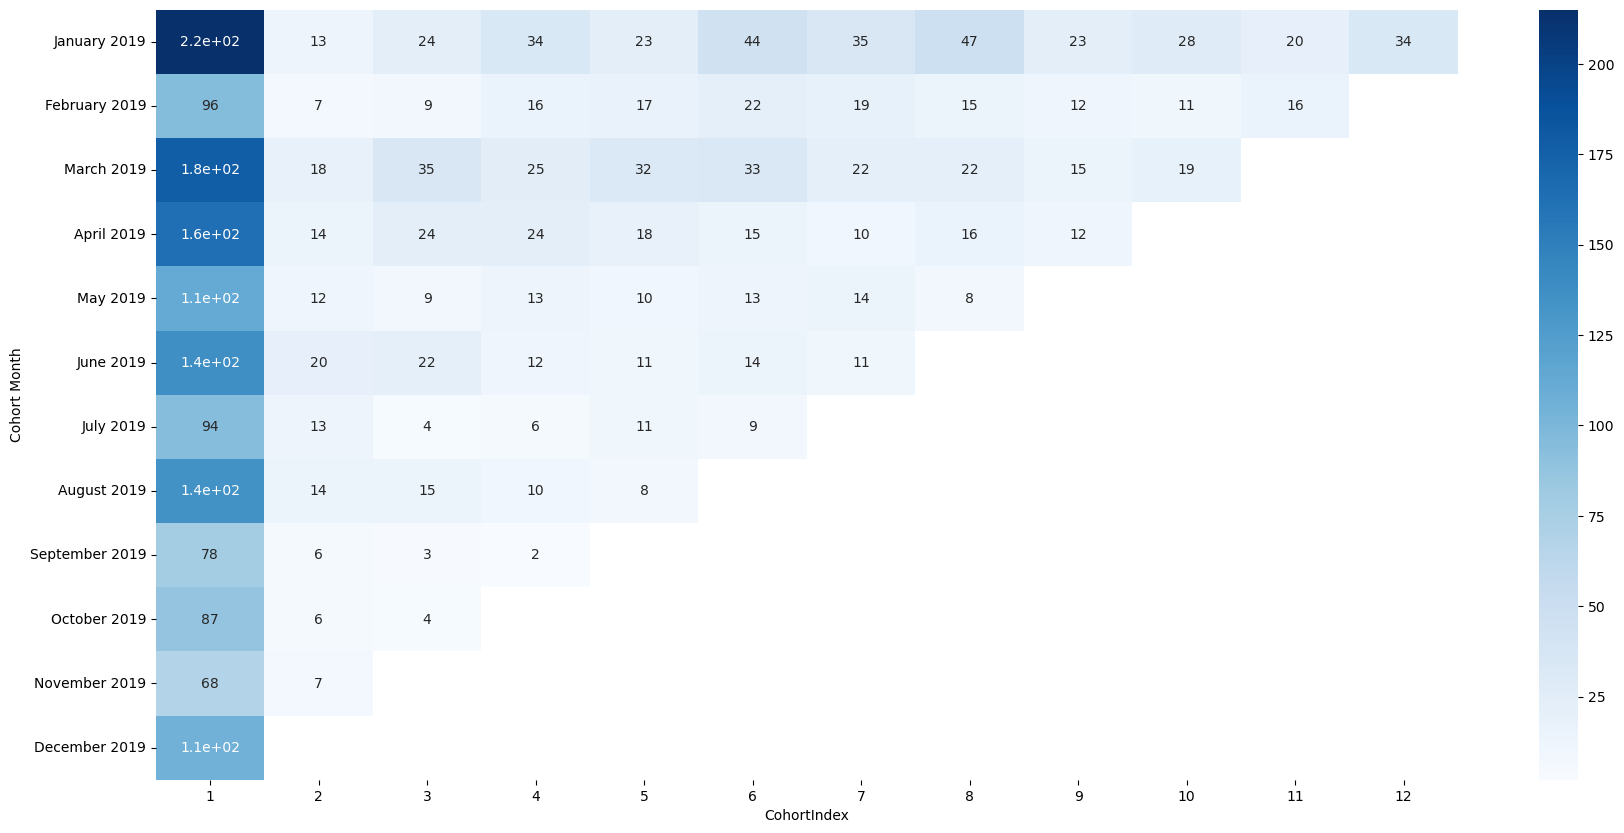

In [129]:
# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [130]:
#cohort table for %
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
January 2019,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
February 2019,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
March 2019,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
April 2019,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
May 2019,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
June 2019,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
July 2019,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
August 2019,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2019,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


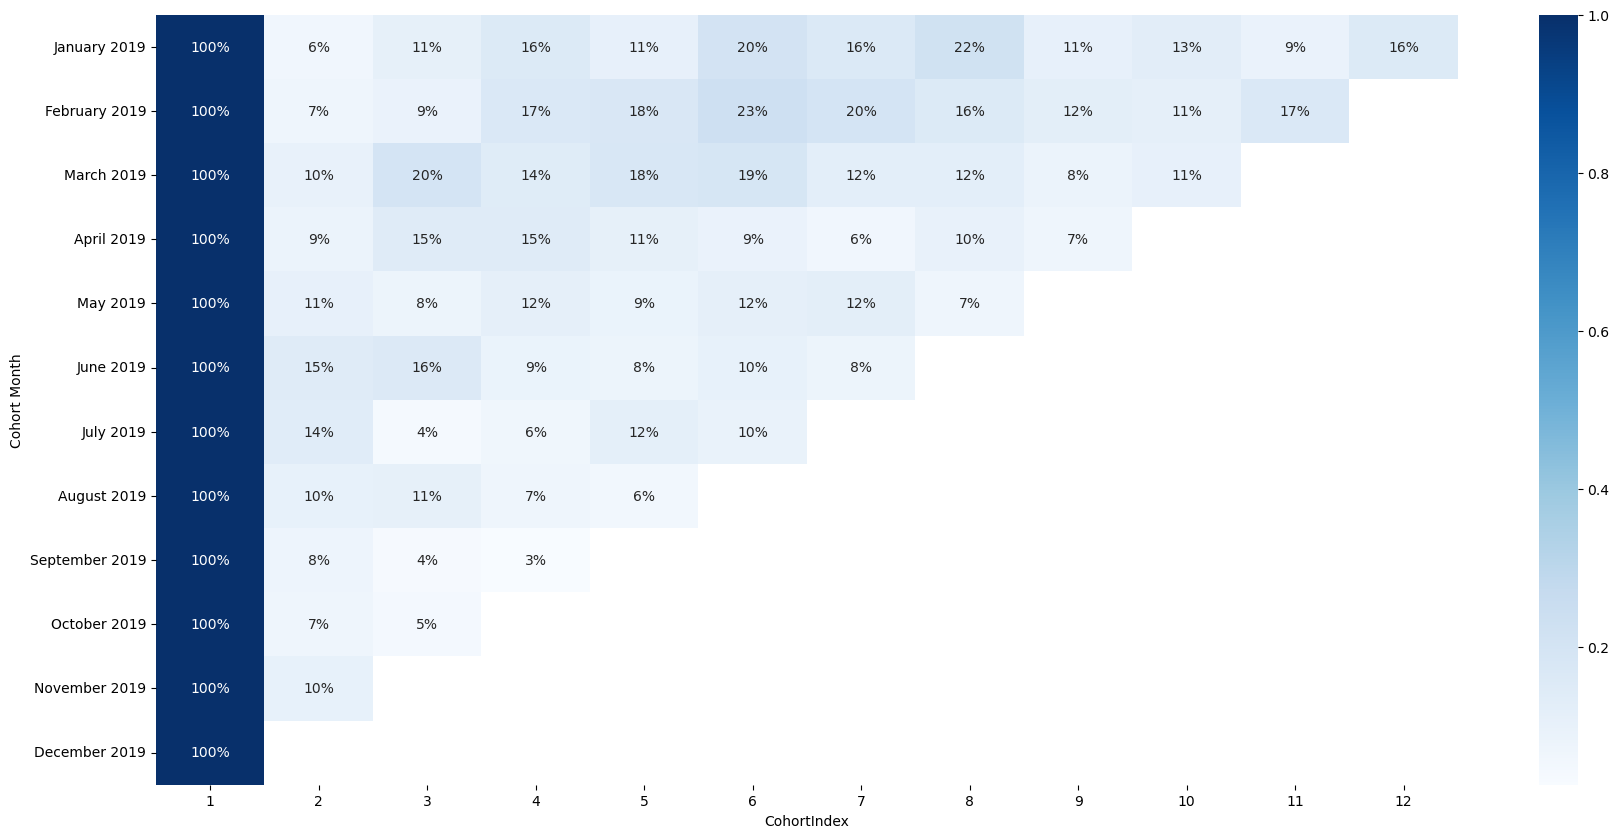

In [134]:
#final chart
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap='Blues')
plt.show()

# Insights
- Among the categories, Apparel (34%) and Nest-USA (24%) contributed to the most sales.
- A majority (66%) of customers preferred one particular quantity.
- Coupon usage was recorded at 34%.
- August saw the highest sales compared to other months.
- The most popular coupon was 'sale20' used at 33.69%.
- Females made up a larger portion of the customers than males.
- Chicago and California had the most sales compared to other locations.
- The product GGOEGGOA017399 has the highest number of purchases
- The retention rate is high in July, August, and September
- The majority of offline spending is between 2500 and 3500.
- Most of the online spending is between 1258 and 435.

# Recommendations:

#### 1. Focus Marketing on Top Categories:
- Since Apparel and Nest-USA contribute significantly to sales, prioritize marketing efforts and promotions for these categories. 
- Consider special campaigns or exclusive deals to boost their sales further.

#### 2. Geographic Focus on Chicago and California:
- With Chicago and California leading in sales, allocate more resources to these regions. 
- This could include targeted advertising, pop-up stores, or special events to further engage customers in these locations.

#### 3. Retention Strategies for Key Months:
- With high retention rates in July, August, and September, implement loyalty programs, special offers, or exclusive content during these months to maintain and increase retention. 
- Encourage repeat purchases by providing incentives for returning customers.

